In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv("D:\\Fraud.csv")

In [3]:
d.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
d.shape

(6362620, 11)

In [5]:
d.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
d.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### no missing value in the dataset

### Summary of 'Numerical' attributes:

In [7]:
d_num = d.describe([.25, .5, .75])
d_num

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Summary of 'Categorical' columns:

In [8]:
d_cat = d.describe(include='object')
d_cat

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


### EDA

In [9]:
d['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


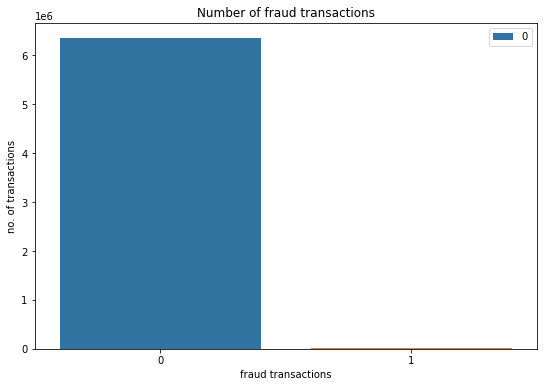

In [10]:
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.countplot(d['isFraud'])
plt.xlabel("fraud transactions")
plt.ylabel('no. of transactions')
plt.legend([0,1])
plt.title("Number of fraud transactions")
plt.show()

#### as fraud transactions are very low in this dataset, it creates the imbalance class

In [11]:
d['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

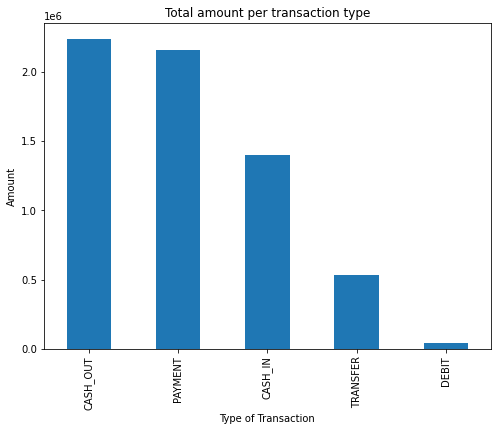

In [12]:
plt.figure(figsize=(8, 6))
d['type'].value_counts().plot.bar()
plt.title("Total amount per transaction type")
plt.xlabel('Type of Transaction')
plt.ylabel('Amount')
plt.show()

#### Mostly amount made by CASH_OUT type

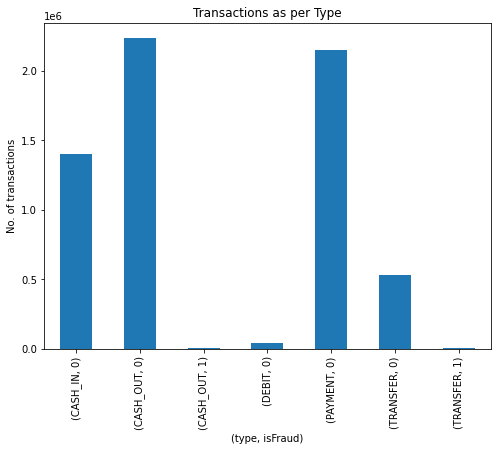

In [13]:
plt.figure(figsize=(8, 6))
d.groupby(['type', 'isFraud']).size().plot.bar()
plt.title('Transactions as per Type')
plt.xlabel('(type, isFraud)')
plt.ylabel('No. of transactions')
plt.show()

#### as per the plot, CASH_OUT and TRANSFER type have chances of having fraud transactions so we can remove other types

In [14]:
d = d.loc[~(d['type'].isin(['CASH_IN', 'DEBIT', 'PAYMENT']))]
d.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


<AxesSubplot:ylabel='count'>

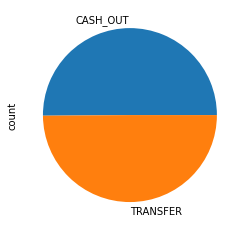

In [15]:
d_fraud = d[d.isFraud == 1] 
print(d_fraud['type'].value_counts())
d_fraud['type'].value_counts().plot.pie()

#### so we get to know both CASH_OUT and TRANSFER are distributed approximately equal towards fraud transactions

### Checking for Correlation

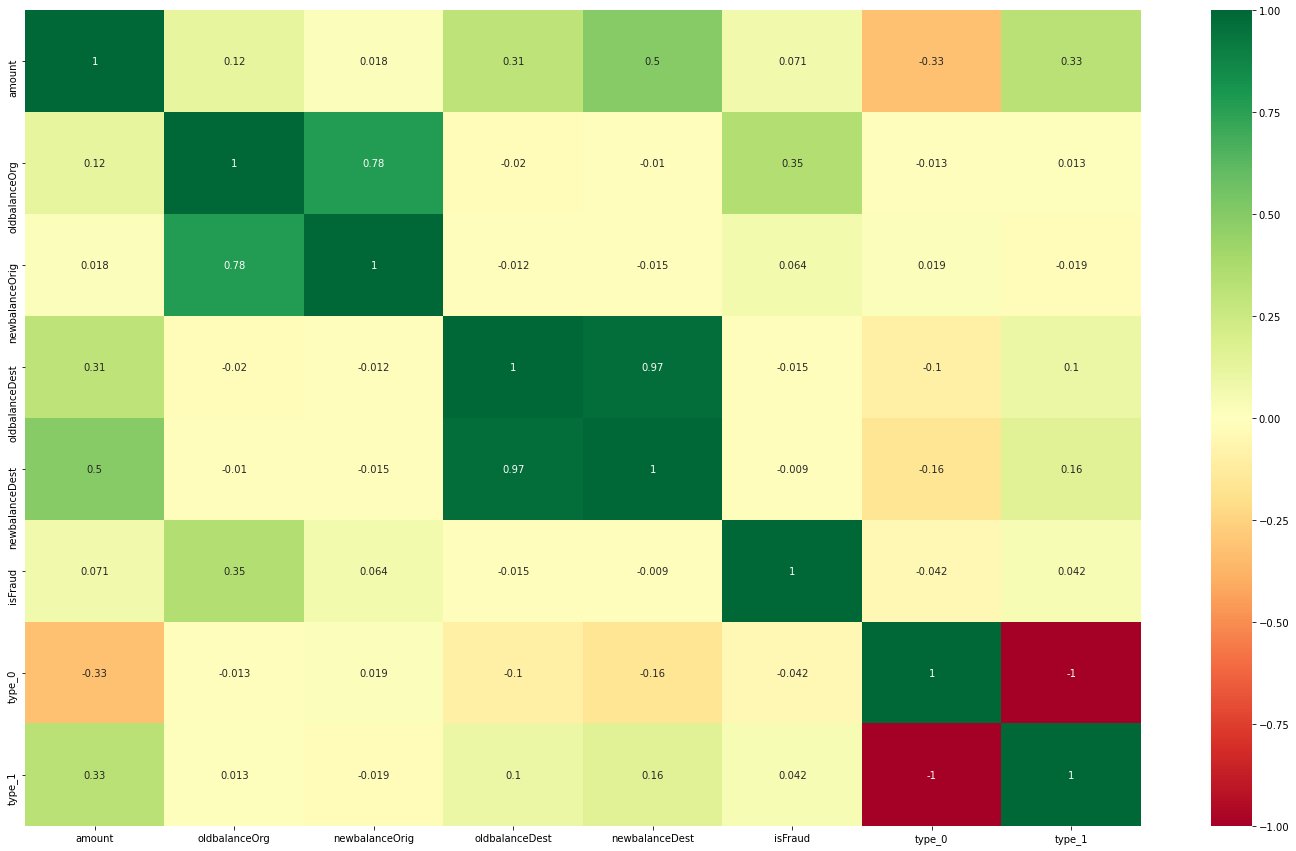

In [52]:
import seaborn as sns
corr = d.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

1) Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054). here i have to drop the newbalanceDest feature.

2) likewise above oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). here i have to drop the oldbalanceOrg feature.

We are dropping the columns that we don't require anymore

In [16]:
d = d.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [17]:
col = ['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','amount']

#### scaling the values

In [18]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
d[col] = scale.fit_transform(d[col])
d

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,0.000002,0.000003,0.0,0.000000,0.000000,1
3,CASH_OUT,0.000002,0.000003,0.0,0.000059,0.000000,1
15,CASH_OUT,0.002479,0.000257,0.0,0.000014,0.000145,0
19,TRANSFER,0.002329,0.000012,0.0,0.000063,0.000000,0
24,TRANSFER,0.003372,0.000182,0.0,0.000018,0.007634,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,0.003674,0.005701,0.0,0.000000,0.000954,1
6362616,TRANSFER,0.068272,0.105923,0.0,0.000000,0.000000,1
6362617,CASH_OUT,0.068272,0.105923,0.0,0.000192,0.017912,1
6362618,TRANSFER,0.009195,0.014265,0.0,0.000000,0.000000,1


#### label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
d[['type']] = d[['type']].apply(LabelEncoder().fit_transform)

In [20]:
d = pd.get_dummies(d,columns = ['type'])

In [21]:
d.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1
2,0.000002,0.000003,0.0,0.000000,0.000000,1,False,True
3,0.000002,0.000003,0.0,0.000059,0.000000,1,True,False
15,0.002479,0.000257,0.0,0.000014,0.000145,0,True,False
19,0.002329,0.000012,0.0,0.000063,0.000000,0,False,True
24,0.003372,0.000182,0.0,0.000018,0.007634,0,False,True


### Train test split

In [22]:
# separating the data and labels
X = d.drop(columns = 'isFraud', axis=1)
y = d['isFraud']

In [23]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_0,type_1
2,0.000002,0.000003,0.0,0.000000,0.000000,False,True
3,0.000002,0.000003,0.0,0.000059,0.000000,True,False
15,0.002479,0.000257,0.0,0.000014,0.000145,True,False
19,0.002329,0.000012,0.0,0.000063,0.000000,False,True
24,0.003372,0.000182,0.0,0.000018,0.007634,False,True
...,...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.0,0.000000,0.000954,True,False
6362616,0.068272,0.105923,0.0,0.000000,0.000000,False,True
6362617,0.068272,0.105923,0.0,0.000192,0.017912,True,False
6362618,0.009195,0.014265,0.0,0.000000,0.000000,False,True


In [24]:
y

2          1
3          1
15         0
19         0
24         0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 2770409, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2770409, 7) (2216327, 7) (554082, 7)


In [28]:
print(y.shape, y_train.shape, y_test.shape)

(2770409,) (2216327,) (554082,)


### model building

logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log = LogisticRegression()

# Fit the model to your data
log.fit(X, y)

# Make predictions
pred_log = log.predict(X_test)
#print(pred_log)

In [30]:
# pip install scikit-plot

In [31]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_roc_curve
from sklearn.metrics import classification_report

In [32]:
c_log = classification_report(y_test, pred_log)
print(c_log)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552389
           1       0.95      0.10      0.18      1693

    accuracy                           1.00    554082
   macro avg       0.97      0.55      0.59    554082
weighted avg       1.00      1.00      1.00    554082



decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dec = DecisionTreeClassifier()

# Fit the model to your data
dec.fit(X, y)

# Make predictions
pred_dec = dec.predict(X_test)
#print(pred_dec)

In [36]:
c_dec = classification_report(y_test, pred_dec)
print(c_dec)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552389
           1       1.00      0.95      0.97      1693

    accuracy                           1.00    554082
   macro avg       1.00      0.97      0.99    554082
weighted avg       1.00      1.00      1.00    554082



In [43]:
from sklearn.metrics import accuracy_score
print(f"Base Model Accuracy: {accuracy_score(y_test, pred_dec)}")

Base Model Accuracy: 0.9998465931035478


random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
r = RandomForestClassifier()

# Fit the model to your data
r.fit(X, y)

# Make predictions
pred_rand = r.predict(X_test)
#print(pred_rand)

In [38]:
c_rand = classification_report(y_test, pred_rand)
print(c_rand)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552389
           1       1.00      0.84      0.91      1693

    accuracy                           1.00    554082
   macro avg       1.00      0.92      0.96    554082
weighted avg       1.00      1.00      1.00    554082



Gradient Boosting (e.g., XGBoost)

In [39]:
import xgboost as xgb

# Create an XGBoost model
x = xgb.XGBClassifier()

# Fit the model to your data
x.fit(X, y)

# Make predictions
pred_xg = x.predict(X_test)
#print(pred_xg)

[0 0 0 ... 0 0 0]


In [40]:
c_xg = classification_report(y_test, pred_xg)
print(c_xg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552389
           1       0.99      0.89      0.94      1693

    accuracy                           1.00    554082
   macro avg       0.99      0.94      0.97    554082
weighted avg       1.00      1.00      1.00    554082



#### Out of all, we get max value of precision and recall in decision tree, we will tune hyperparameters of decision tree

### hyperparameter tuning in decision tree

In [41]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

In [45]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [46]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [48]:
dec_best = grid_search.best_estimator_

In [50]:
print(dec_best)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)


In [51]:
print(classification_report(y_test, dec_best.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552389
           1       0.92      0.84      0.88      1693

    accuracy                           1.00    554082
   macro avg       0.96      0.92      0.94    554082
weighted avg       1.00      1.00      1.00    554082

